In [866]:
# importing packages
from understatscraper import Understat
import pandas as pd
from mplsoccer.pitch import Pitch, VerticalPitch
import matplotlib.pyplot as plt
import warnings
from highlight_text import fig_text
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
import numpy as np
%matplotlib inline
from IPython.display import display, HTML
from PIL import Image

In [3]:
# instance of the class

understat = Understat()

### Seasons of Batshuayi between 2015 and 2021

- 2015-16 Ligue 1 Marseille
- 2016-18 EPL Chelsea
- 2017-18 Bundesliga Borussia Dortmund (half season loan)
- 2018-19 La Liga Valencia (half season loan)
- 2018-19 EPL Crystal Palace (half season loan)
- 2019-20 EPL Chelsea
- 2020-21 EPL Crystal Palace

In [57]:
ligues = ['Ligue 1','EPL','EPL','Bundesliga','La liga','EPL','EPL','EPL']
seasons = [2015,2016,2017,2017,2018,2018,2019,2020]

In [257]:
# creating dataframe by iterating through two lists
df = pd.DataFrame()
for l,s in zip(ligues,seasons):
    df_b = understat.season(l,s,player="Michy Batshuayi")
    df = df.append(df_b)

### Inspecting dataframe

In [258]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,61453,7,MissedShots,0.8730000305175781,0.5829999923706055,0.12163817882537842,Michy Batshuayi,h,1678,OpenPlay,2015,LeftFoot,1871,Marseille,Caen,0,1,2015-08-08 23:00:00,Abdel Barrada,Throughball
2,61458,25,BlockedShot,0.909000015258789,0.675,0.06413242965936661,Michy Batshuayi,h,1678,OpenPlay,2015,LeftFoot,1871,Marseille,Caen,0,1,2015-08-08 23:00:00,Florian Thauvin,Pass
3,61460,29,SavedShot,0.919000015258789,0.555,0.08026830852031708,Michy Batshuayi,h,1678,FromCorner,2015,Head,1871,Marseille,Caen,0,1,2015-08-08 23:00:00,Abdel Barrada,Cross
5,61462,38,BlockedShot,0.9230000305175782,0.48200000762939454,0.5214341878890991,Michy Batshuayi,h,1678,FromCorner,2015,RightFoot,1871,Marseille,Caen,0,1,2015-08-08 23:00:00,None,None
11,61709,82,MissedShots,0.7559999847412109,0.39799999237060546,0.01823040470480919,Michy Batshuayi,a,1678,OpenPlay,2015,RightFoot,1886,Reims,Marseille,1,0,2015-08-16 16:00:00,None,TakeOn


In [259]:
# resetting index
df.reset_index(drop=True,inplace=True)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               253 non-null    object
 1   minute           253 non-null    object
 2   result           253 non-null    object
 3   X                253 non-null    object
 4   Y                253 non-null    object
 5   xG               253 non-null    object
 6   player           253 non-null    object
 7   h_a              253 non-null    object
 8   player_id        253 non-null    object
 9   situation        253 non-null    object
 10  season           253 non-null    object
 11  shotType         253 non-null    object
 12  match_id         253 non-null    object
 13  h_team           253 non-null    object
 14  a_team           253 non-null    object
 15  h_goals          253 non-null    object
 16  a_goals          253 non-null    object
 17  date             253 non-null    ob

In [261]:
# backup
df2 = df.copy()

In [267]:
df['X'] = pd.to_numeric(df['X'])*100
df['Y'] = pd.to_numeric(df['Y'])*100
df['xG'] = pd.to_numeric(df['xG'])

In [269]:
df.xG.sum()

39.91443486139178

In [233]:
df['result'].value_counts()

MissedShots    83
SavedShot      68
BlockedShot    55
Goal           40
ShotOnPost      6
Name: result, dtype: int64

In [380]:
df = df[df['result']!='OwnGoal'] 

In [199]:
df.reset_index(drop=True,inplace=True)

In [92]:
df[df['result'] == 'Goal']['shotType'].value_counts()

RightFoot    20
LeftFoot     16
Head          4
Name: shotType, dtype: int64

In [234]:
df[df['result'] == 'Goal']['situation'].value_counts()

OpenPlay      33
FromCorner     3
Penalty        2
SetPiece       2
Name: situation, dtype: int64

In [101]:
df['result'].value_counts()

MissedShots    83
SavedShot      68
BlockedShot    55
Goal           40
ShotOnPost      6
Name: result, dtype: int64

In [381]:
df = df[df['situation']!='Penalty'].reset_index(drop=True)

In [382]:
df_missed = df[df['result']=='MissedShots'].reset_index(drop=True)
df_saved = df[df['result']=='SavedShot'].reset_index(drop=True)
df_blocked = df[df['result']=='BlockedShot'].reset_index(drop=True)
df_goal = df[df['result']=='Goal'].reset_index(drop=True)
df_post = df[df['result']=='ShotOnPost'].reset_index(drop=True)

In [393]:
df[df.season=='2015']['xG'].sum()

17.055521555244923

In [411]:
mins_90 = 6509/90

In [419]:
np_xGper90 = round(df['xG'].sum()/mins_90,2)

In [435]:
conversion = round(len(df_goal)/len(df),2)

In [442]:
np_xGperShot = round(df['xG'].sum()/len(df),2)

In [445]:
shot90 = round(len(df)/mins_90,2)

### Shotmap

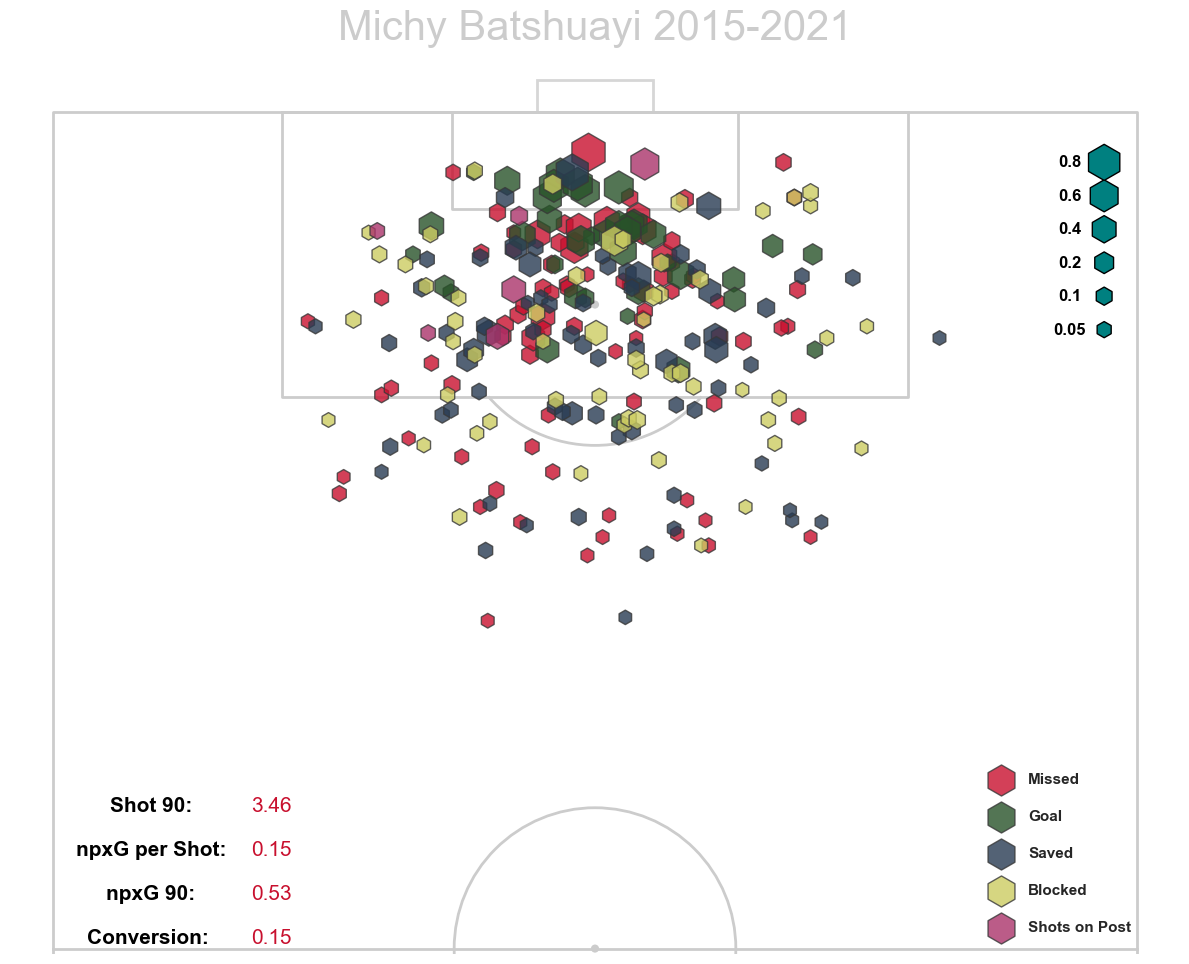

In [634]:
pitch = VerticalPitch(pad_bottom=0.5,
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8,
                     pitch_type='opta')

fig, ax = pitch.draw(figsize=(12, 10))


re = pitch.scatter(df_missed['X'],df_missed['Y'],
                   s=(df_missed["xG"] * 720)+100,
                   alpha=.8,
                   c='#C8102E', 
                   edgecolors='#383838',  # give the markers a charcoal border
                   marker='h',label="Missed",
                   ax=ax)

re1 = pitch.scatter(df_goal["X"],df_goal["Y"],
                   s=(df_goal["xG"] * 720)+100,
                   alpha=.8,
                   c='#285229',
                   edgecolors='#383838',
                   marker='h',label="Goal",
                   ax=ax)

re2 = pitch.scatter(df_saved["X"],df_saved["Y"],
                   s=(df_saved["xG"] * 720)+100,
                   alpha=.8,
                   c='#283b52',
                   edgecolors='#383838',
                   marker='h',label="Saved",
                   ax=ax)

re3 = pitch.scatter(df_blocked["X"],df_blocked["Y"],
                   s=(df_blocked["xG"] * 720)+100,
                   alpha=.8,
                   c='#cccc62',
                   edgecolors='#383838',
                   marker='h',
                   ax=ax,label="Blocked")

re4 = pitch.scatter(df_post["X"],df_post["Y"],
                   s=(df_post["xG"] * 720)+100,
                   alpha=.8,
                   c='#AA336A',
                   edgecolors='#383838',
                   marker='h',
                   ax=ax,label="Shots on Post")

#making legends equal size
legend = ax.legend(bbox_to_anchor=(0.97, 0.22),labelspacing=1.5,prop={'weight':'bold','size':11})
legend.legendHandles[0]._sizes = [500]
legend.legendHandles[1]._sizes = [500]
legend.legendHandles[2]._sizes = [500]
legend.legendHandles[3]._sizes = [500]
legend.legendHandles[4]._sizes = [500]


txt = ax.text(x=50, y=105, s='Michy Batshuayi 2015-2021',
              size=30,
              color=pitch.line_color,
              va='center', ha='center')

mSize = [0.05,0.10,0.2,0.4,0.6,0.8]
mSizeS = [720 * i for i in mSize]
mSizeS = [100 + i for i in mSizeS]
mx = [3,3,3,3,3,3]
my = [87,89,91,93,95,97]
plt.scatter(mx,my,s=mSizeS,facecolors="teal", edgecolor="black",marker='h')
for i in range(len(mx)):
    plt.text(mx[i]+ 3.2, my[i], mSize[i], fontsize=12, c="black",ha="center", va="center",fontweight='bold')

fig.text(x=0.13, y=0.13, s='Shot 90:\n\nnpxG per Shot:\n\nnpxG 90:\n\nConversion: ' , va='center',
                  ha='center', size=15, c='black',fontweight="bold")

fig.text(x=0.23, y=0.13, s="{}\n\n{}\n\n{}\n\n{}".format(shot90,np_xGperShot,np_xGper90,conversion), va='center',
                  ha='center', size=15, color='#C8102E')

plt.show()

### xG Flow Chart

In [470]:
df['Goal'] = np.where(df['result']=='Goal',1,0)

In [476]:
goals_bats = df['Goal'].cumsum().tolist()
xG_bats = df['xG'].cumsum().tolist()

In [879]:
df['goalcumulative'] = goals_bats
df['xgcumulative'] = xG_bats
df['date'] = pd.to_datetime(df['date'])

In [931]:
# preparing annotations
xg1 = df[df['season'] == '2015'].iloc[0]['xgcumulative'] # Marseille
xg2 = df[df['season'] == '2015'].iloc[-1]['xgcumulative'] # Chelsea
xg3 = df[df['date'] == '2018-02-02 19:30:00'].iloc[0]['xgcumulative'] # Dortmund
xg4 = df[df['season'] == '2018'].iloc[0]['xgcumulative'] # Valencia
xg5 = df[df['date'] == '2019-02-02 15:00:00'].iloc[0]['xgcumulative'] # Crystal Palace
xg6 = df[df['season'] == '2019'].iloc[0]['xgcumulative'] # Chelsea
xg7 = df[df['season'] == '2020'].iloc[0]['xgcumulative'] # Crystal Palace

xg_list = [xg1,xg2,xg3,xg4,xg5,xg6,xg7]

In [932]:
d1 = df[df['season'] == '2015'].iloc[0]['date']
d2 = df[df['season'] == '2015'].iloc[-1]['date']
d3 = df[df['date'] == '2018-02-02 19:30:00'].iloc[0]['date']
d4 = df[df['season'] == '2018'].iloc[0]['date']
d5 = df[df['date'] == '2019-02-02 15:00:00'].iloc[0]['date']
d6 = df[df['season'] == '2019'].iloc[0]['date']
d7 = df[df['season'] == '2020'].iloc[0]['date']

date_list = [d1,d2,d3,d4,d5,d6,d7]

In [934]:
teams = ['M','CH','BD','V','CP','CH','CP']

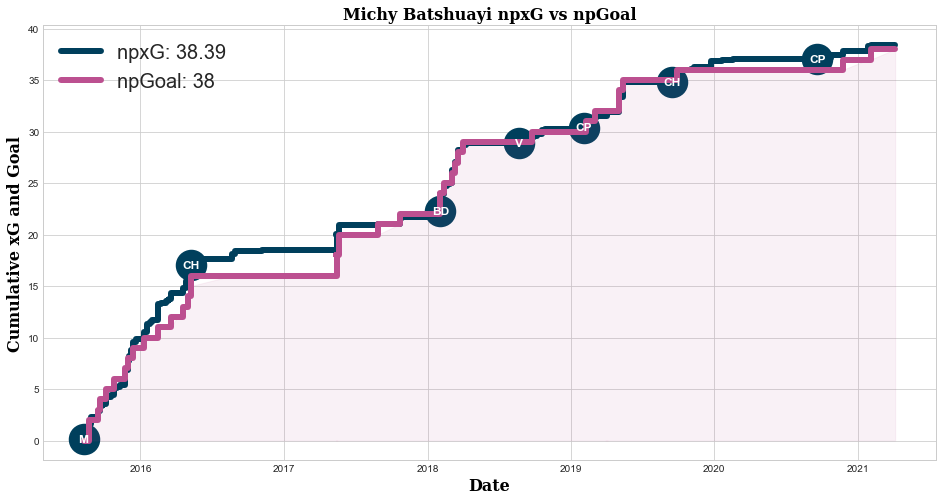

In [944]:
plt.style.use('seaborn-whitegrid')
fig,ax = plt.subplots(figsize=(16,8))


ax.step(x = df['date'] ,y = xG_bats, c = '#003f5c' ,linewidth = 6)
ax.step(x = df['date'] ,y = goals_bats, c = '#bc5090' ,linewidth = 6)


ax.scatter(x=date_list,y=xg_list, color='#003f5c', edgecolor='#003f5c',s=900,linewidths=1.5)

for i in range(len(xg_list)):
    plt.annotate(teams[i], (date_list[i], xg_list[i]),c='white',size=12,ha='center',va='center',fontweight='bold')

font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }

plt.xlabel('Date',fontdict=font)
plt.ylabel('Cumulative xG and Goal',fontdict=font)
plt.title('Michy Batshuayi npxG vs npGoal',fontdict=font)

plt.fill_between(df['date'],goals_bats, alpha=0.08, color='#bc5090')

ax.legend(['npxG: {}'.format(round(max(xG_bats),2)), 'npGoal: {}'.format(max(goals_bats))],loc="best",fontsize=20)

plt.show()

### Comparing Seasons

In [747]:
# Batshuayi npxG cumulative 9.01 for Besiktas as 02/02/2022, source: statsbomb
# Batshuayi total minutes 1546 for Besiktas
# Batshuayi 6 total npGoals as 02/02/2022
# Batshuayi np shots 90 3.72, source whoscored
# Batshuayi total np shot 64

npxG90_bjk = round(9.01/(1546/90),2)
shots90_bjk = 3.72
conversion_bjk = round(6/64,2)
npxG_shot_bjk = round(9.01/64,2)

In [748]:
# Batshuayi Marseille 2015 season
# 2941 minutes, understat

npxG90_2015 = round(df[df['season']=='2015']['xG'].sum()/(2941/90),2)
shots90_2015 = round(len(df[df['season']=='2015'])/(2941/90),2)
conversion_2015 = round(len(df[(df['season']=='2015') & (df['result']=='Goal')])/len(df[df['season']=='2015']),2)
npxG_shot_2015 = round(df[df['season']=='2015']['xG'].sum()/ len(df[df['season']=='2015']),2)

In [749]:
# rows
rows = ['npxG 90','Shots 90','Conversion','npXG per Shot']

In [794]:
bats = np.array([[npxG90_2015,npxG90_bjk],[shots90_2015,shots90_bjk],[conversion_2015,conversion_bjk],[npxG_shot_2015,npxG_shot_bjk]])
df_bats = pd.DataFrame(data=bats, index=rows, columns=["Marseille 15/16", "Besiktas 21/22"])

In [853]:
def comparing_rows(row):    

    highlight = 'background-color: lightcoral;'
    default = ''
    equal = 'background-color: lightblue;'

    # must return one string per cell in this row
    if row['Marseille 15/16'] > row['Besiktas 21/22']:
        return [highlight, default]
    elif row['Besiktas 21/22'] > row['Marseille 15/16']:
        return [default, highlight]
    else:
        return [equal, equal]

In [854]:
df_bats_table = df_bats.style.apply(comparing_rows,axis=1).format("{:.3}")

In [873]:
html = df_bats_table.render()
display(HTML(html))

,Marseille 15/16,Besiktas 21/22
npxG 90,0.52,0.52
Shots 90,3.67,3.72
Conversion,0.12,0.09
npXG per Shot,0.14,0.14


### Scatter Plots from fbref

In [946]:
#scraping fbref data, reference to geek culture on medium
#https://medium.com/geekculture/an-introduction-to-football-player-dashboards-using-python-and-matplotlib-eb5328dfe85f

def readfromhtml(filepath):
    df = pd.read_html(filepath)[0]
    column_lst = list(df.columns)
    for index in range(len(column_lst)):
        column_lst[index] = column_lst[index][1]
        
    df.columns = column_lst
    df.drop(df[df['Player'] == 'Player'].index, inplace=True)
    df = df.fillna('0')
    df.set_index('Rk', drop=True, inplace=True)
    try:
        df['Comp'] = df['Comp'].apply(lambda x: ' '.join(x.split()[1:]))
        df['Nation'] = df['Nation'].astype(str)
        df['Nation'] = df['Nation'].apply(lambda x: x.split()[-1])
    except:
        print('Error in uploading file:' + filepath)
    finally:
        df = df.apply(pd.to_numeric, errors='ignore')
        return df

df_fbref = readfromhtml('https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats')

In [949]:
df_fbref

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
Rk,,,,,,,,,,,,,,,,,,,,,
1,Max Aarons,ENG,DF,Norwich City,Premier League,22-031,2000,20.9,0,9,...,20.2,0,0,0,0.6,0.6,0.06,-0.6,-0.6,Matches
2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34-129,1987,21.0,1,14,...,19.1,0,0,0,1.0,1.0,0.07,0.0,0.0,Matches
3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,21-315,2000,18.2,0,8,...,19.6,0,0,0,0.5,0.5,0.06,-0.5,-0.5,Matches
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29-003,1993,20.3,0,19,...,21.6,0,0,0,1.7,1.7,0.09,-1.7,-1.7,Matches
5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,21-298,2000,0.5,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches
6,Dickson Abiama,NGA,FW,Greuther Fürth,Bundesliga,23-093,1998,6.5,0,18,...,15.6,0,0,0,2.2,2.2,0.12,-2.2,-2.2,Matches
7,Matthis Abline,FRA,FW,Rennes,Ligue 1,18-313,2003,1.1,0,2,...,8.6,0,0,0,0.3,0.3,0.17,-0.3,-0.3,Matches
8,Tammy Abraham,ENG,FW,Roma,Serie A,24-125,1997,20.6,10,63,...,11.8,2,0,0,12.1,12.1,0.19,-2.1,-2.1,Matches
9,Luis Abram,PER,DF,Granada,La Liga,25-342,1996,6.2,0,2,...,7.0,0,0,0,0.5,0.5,0.24,-0.5,-0.5,Matches
